# Data Cleaning with Pandas
lebih banyak lagi mempelajari cara merapikan data dengan pandas

# Time Series
mempelajari tipe data yang ada waktu urutnya, dinamakan "time series"

In [97]:
import numpy as np
import pandas as pd

from datetime import datetime

In [46]:
df_prop = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv")

df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [47]:
df_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [48]:
# langsung dropna, hanya akan menghapus data yang terdeteksi sebagai missing value
df_prop.dropna()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
8,100009000.0,215.0,TREMONT,Y,na,2,1800


cara deteksi missing value yang tidak standard

kita bisa tambahkan opsi na_values saat sedang load datanya

In [49]:
df_prop = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv", 
                      na_values=["na", "--", "n/a", "-"])

df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [50]:
df_prop.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

selain dropna yang menghapus seluruh baris data saat salah satu kolom punya missing value, kita bisa coba isi dulu data yang hilang2 ini, kita perhatikan per kolomnya.

misalkan, kolom PID sebenarnya hanyalah angka urut, kita bisa isi saja sesuai lokasi baris datanya

```python
# manual diisi
df_prop.loc[4, "PID"] = "100005000"
```

atau cara lain, dengan loop kita cek satu per satu baris data dan kalau kosong kita isi sesuai pattern nya

In [51]:
for index, row in df_prop.iterrows():
    # print(index, row["PID"])

    # print(np.isnan(row["PID"]))
    if (np.isnan(row["PID"])):
        df_prop.loc[index, "PID"] = 100001000.0 + 1000 * index

In [52]:
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


berikutnya, kolom ST_NUM untuk street number. apakah mau diisi sebuah angka rata2, angka fix, atau dibiarkan missing value?

di contoh kali ini, kita isi rumah2 yang tidak punya street number dengan angka 200

In [53]:
df_prop["ST_NUM"] = df_prop["ST_NUM"].fillna(200)

In [54]:
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,200.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,200.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


kolom ST_NAME tidak ada missing value

kolom OWN_OCCUPIED harusnya cuma berisi "Y" atau "N" untuk indikasi apakah rumah ditinggali orang/ kosong. Tapi ada numerik value disana. Kita bisa pakai loop untuk data cleaning lagi.

In [55]:
for index, row in df_prop.iterrows():
    # kita cek kalau value bukan "Y" bukan "N" maka kita ubah jadi "U" untuk unknown
    k1 = (row["OWN_OCCUPIED"] == "N")
    k2 = (row["OWN_OCCUPIED"] == "Y")
    if (k1):
        pass
    elif (k2):
        pass
    else:
        df_prop.loc[index, "OWN_OCCUPIED"] = "U"


In [56]:
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,200.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,U,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,200.0,WASHINGTON,U,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


kolom berikut NUM_BEDROOMS jumlah kamar tidur harusnya isinya numerik semua. disini datanya banyak yang tidak terisi.

kita bisa asumsikan kalau jumlah bedroom yang missing adalah rata2 jumlah bedroom lainnya.

In [57]:
df_prop["NUM_BEDROOMS"] = df_prop["NUM_BEDROOMS"].fillna(np.round(df_prop["NUM_BEDROOMS"].mean()))

In [58]:
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,200.0,LEXINGTON,N,2.0,1,850.0
3,100004000.0,201.0,BERKELEY,U,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.0,1,800.0
6,100007000.0,200.0,WASHINGTON,U,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,2.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,2.0,2,1800.0


NUM_BATH harusnya numerik, jadi kita bisa hapus value2 yang non-numerik.

Setelah itu untuk semua missing value bisa kita isi dengan rata2 lagi, atau angka lain seperti mode

In [74]:
for index, row in df_prop.iterrows():
    try:
        df_prop.loc[index, "NUM_BATH"] = float(row["NUM_BATH"])
    except ValueError:
        # kalau ada yang error saat di convert jadi float, kita ubah jadi nan
        df_prop.loc[index, "NUM_BATH"] = float(np.nan)

In [75]:
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,200.0,LEXINGTON,N,2.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,U,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.0,1.0,800.0
6,100007000.0,200.0,WASHINGTON,U,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,2.0,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,2.0,2.0,1800.0


In [77]:
# kita paksa ubah tipe data kolom NUM_BATH menjadi numerik
df_prop["NUM_BATH"] = pd.to_numeric(df_prop["NUM_BATH"])

In [78]:
df_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           9 non-null      float64
 1   ST_NUM        9 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  9 non-null      object 
 4   NUM_BEDROOMS  9 non-null      float64
 5   NUM_BATH      7 non-null      float64
 6   SQ_FT         7 non-null      float64
dtypes: float64(5), object(2)
memory usage: 632.0+ bytes


In [79]:
df_prop["NUM_BATH"] = df_prop["NUM_BATH"].fillna(np.round(df_prop["NUM_BATH"].mean()))

In [80]:
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,200.0,LEXINGTON,N,2.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,U,1.0,1.0,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.0,1.0,800.0
6,100007000.0,200.0,WASHINGTON,U,2.0,1.0,950.0
7,100008000.0,213.0,TREMONT,Y,2.0,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,2.0,2.0,1800.0


kolom terakhir SQ_FT punya 2 missing value, kita isi dengan value rata2 juga

In [81]:
# rata2nya di round ke 100 terdekat
df_prop["SQ_FT"] = df_prop["SQ_FT"].fillna(np.round(df_prop["SQ_FT"].mean() * 100) / 100)

In [82]:
df_prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000.0,200.0,LEXINGTON,N,2.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,U,1.0,1.0,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.0,1.0,800.0
6,100007000.0,200.0,WASHINGTON,U,2.0,1.0,950.0
7,100008000.0,213.0,TREMONT,Y,2.0,1.0,1100.0
8,100009000.0,215.0,TREMONT,Y,2.0,2.0,1800.0


# Case Study: obes.xls
kita akan coba buka data tentang obesitas di England di tahun 2014 dari data.gov.uk untuk kita rapikan datanya dan analisa

In [83]:
# import seluruh file Excel menggunakan pandas ExcelFile
excel_obes = pd.ExcelFile("obes.xls")

In [84]:
# lihat ada sheets apa saja di file excel ini
excel_obes.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [86]:
# ambil 1 sheet saja untuk dimasukkan ke DataFrame
df_72 = excel_obes.parse('7.2', skiprows=4, skipfooter=14)
df_72

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [87]:
# judul kolom yang "Unnamed: 0" kita ubah jadi "Year"
df_72.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

df_72

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [89]:
df_72.isnull().sum()

Year           1
Total          1
Under 16       1
16-24          1
25-34          1
35-44          1
45-54          1
55-64          1
65-74          1
75 and over    1
dtype: int64

In [91]:
# kita hapus baris yang kosong
# bisa pakai dropna, bisa juga hapus baris spesifik pakai index
df_72 = df_72.drop(index=0)

df_72

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [92]:
# kita bisa gunakan kolom Year sebagai judul baris karena isinya unik values
df_72 = df_72.set_index("Year")

df_72

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


Setelah datanya rapi, berikutnya kita coba buat analisa. Kita bisa menjawab pertanyaan seperti:
- apakah anak anak semakin lama semakin obesitas?

anggap anak anak umurnya belasan tahun. kita lihat trend obesitas dari data kita menggunakan plot.

<AxesSubplot:xlabel='Year'>

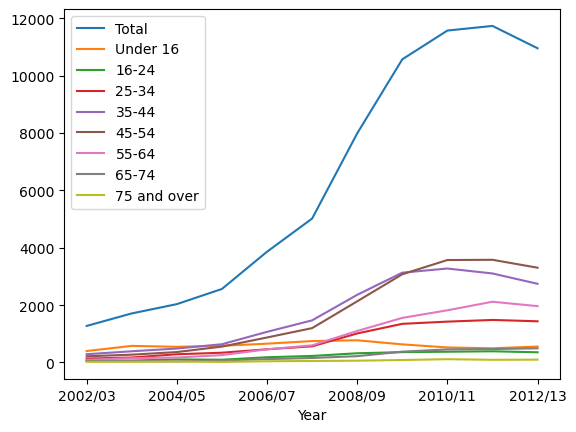

In [93]:
df_obes = df_72.copy()

df_obes.plot()

grup umur yang paling banyak bertambah jumlah obesitasnya adalah di umur Total... Total bukan termasuk grup umur, jadi kolom Total ini justru mengganggu saat kita mau melihat perbandingan kenaikan obesitas antar grup umur berbeda.

Garis trend Total ini menunjukkan pada umumnya semakin banyak orang yang menderita obesitas, tapi tidak memperlihatkan grup umur mana yang cenderung obesitas. jadi kita coba plot lagi tanpa kolom Total.

<AxesSubplot:xlabel='Year'>

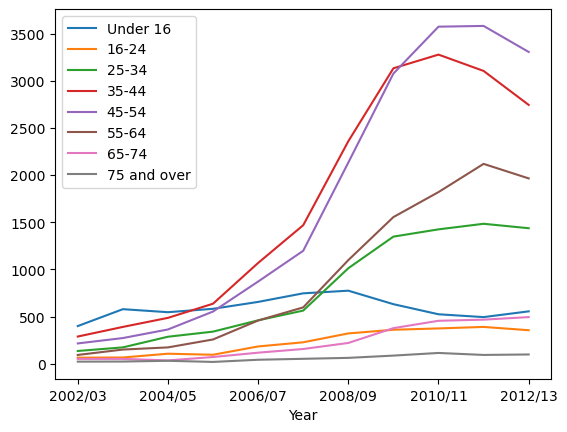

In [94]:
df_obes.drop(columns=["Total"]).plot()

dari plot diatas, grup umur 35-44 dan 45-54 yang paling banyak populasi obesitas. anak anak justru tidak banyak, begitu pula dengan umur 65+. grup kedua yang paling banyak obesitasnya adalah di 24-34 dan 55-64.

In [95]:
# kita break 15 menit sampai jam 20.15 WIB lalu lanjut ke Time Series

# Time Series

In [96]:
from datetime import datetime

In [102]:
# kita bisa pakai pandas untuk membuat date_range, tanggalan urut

sample_dates = pd.date_range(start="28 Feb 2023", end="9 May 2023", freq="D")

sample_dates

DatetimeIndex(['2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09', '2023-03-10', '2023-03-11',
               '2023-03-12', '2023-03-13', '2023-03-14', '2023-03-15',
               '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19',
               '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23',
               '2023-03-24', '2023-03-25', '2023-03-26', '2023-03-27',
               '2023-03-28', '2023-03-29', '2023-03-30', '2023-03-31',
               '2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24',
      

In [103]:
# pura2 sample data jumlah pengunjung website hacktiv8.com per hari
df_visitor = pd.DataFrame(sample_dates, columns=["Date"])
df_visitor["visitors"] = np.random.randint(10, 500, size=len(sample_dates)) 

df_visitor

,Date,visitors
0,2023-02-28,454
1,2023-03-01,15
2,2023-03-02,56
3,2023-03-03,134
4,2023-03-04,186
...,...,...
66,2023-05-05,169
67,2023-05-06,264
68,2023-05-07,334
69,2023-05-08,462


setelah selesai membuat dummy data jumlah visitor website harian, kita coba gunakan beberapa teknik datetime seperti:
- convert datetime jadi format string tertentu
- convert string tanggalan jadi datetime

In [113]:
df_visitor["Tanggal"] = [datetime.strftime(x, format="%a, %d %b'%y") for x in df_visitor["Date"]]

In [114]:
df_visitor

,Date,visitors,Tanggal
0,2023-02-28,454,"Tue, 28 Feb'23"
1,2023-03-01,15,"Wed, 01 Mar'23"
2,2023-03-02,56,"Thu, 02 Mar'23"
3,2023-03-03,134,"Fri, 03 Mar'23"
4,2023-03-04,186,"Sat, 04 Mar'23"
...,...,...,...
66,2023-05-05,169,"Fri, 05 May'23"
67,2023-05-06,264,"Sat, 06 May'23"
68,2023-05-07,334,"Sun, 07 May'23"
69,2023-05-08,462,"Mon, 08 May'23"


membuat sebuah tipe data datetime bisa juga dengan datetime.datetime(year, month, day, hour=0, minute=0, second=0, microsecond=0, tzinfo=None)

perhatikan ada parameter yang punya default value yang tidak harus kita isi, seperti hour, minute, second, otomatis terisi 0 kalau tidak kita isi.

In [122]:
# kita bisa tarik data dengan kondisi
# misal, kita mau ambil data khusus hari selasa dan kamis
# 0 senin, selasa tuesday adalah 1 dan kamis thursday 3

kondisi_selasa = (df_visitor["Date"].dt.weekday == 1)
kondisi_kamis = (df_visitor["Date"].dt.weekday == 3)

df_tuethu = df_visitor[kondisi_selasa | kondisi_kamis]
df_tuethu

,Date,visitors,Tanggal
0,2023-02-28,454,"Tue, 28 Feb'23"
2,2023-03-02,56,"Thu, 02 Mar'23"
7,2023-03-07,163,"Tue, 07 Mar'23"
9,2023-03-09,476,"Thu, 09 Mar'23"
14,2023-03-14,38,"Tue, 14 Mar'23"
16,2023-03-16,60,"Thu, 16 Mar'23"
21,2023-03-21,245,"Tue, 21 Mar'23"
23,2023-03-23,72,"Thu, 23 Mar'23"
28,2023-03-28,16,"Tue, 28 Mar'23"
30,2023-03-30,97,"Thu, 30 Mar'23"


In [123]:
df_tuethu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 70
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      21 non-null     datetime64[ns]
 1   visitors  21 non-null     int32         
 2   Tanggal   21 non-null     object        
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 588.0+ bytes


untuk memudahkan, kita pindahin tanggal kolom "Date" menjadi index

In [124]:
df_visitor = df_visitor.set_index("Date")
df_visitor

,visitors,Tanggal
Date,,
2023-02-28,454,"Tue, 28 Feb'23"
2023-03-01,15,"Wed, 01 Mar'23"
2023-03-02,56,"Thu, 02 Mar'23"
2023-03-03,134,"Fri, 03 Mar'23"
2023-03-04,186,"Sat, 04 Mar'23"
...,...,...
2023-05-05,169,"Fri, 05 May'23"
2023-05-06,264,"Sat, 06 May'23"
2023-05-07,334,"Sun, 07 May'23"


In [127]:
# pengambilan data tidak perlu .dt lagi, tapi karena ada di kolom index, kita pakai .index
df_visitor[(df_visitor.index.weekday == 1) | (df_visitor.index.weekday == 3)]

,visitors,Tanggal
Date,,
2023-02-28,454,"Tue, 28 Feb'23"
2023-03-02,56,"Thu, 02 Mar'23"
2023-03-07,163,"Tue, 07 Mar'23"
2023-03-09,476,"Thu, 09 Mar'23"
2023-03-14,38,"Tue, 14 Mar'23"
2023-03-16,60,"Thu, 16 Mar'23"
2023-03-21,245,"Tue, 21 Mar'23"
2023-03-23,72,"Thu, 23 Mar'23"
2023-03-28,16,"Tue, 28 Mar'23"


In [130]:
# ambil tanggal tertentu
df_visitor.loc[["1 April 2023"]]

,visitors,Tanggal
Date,,
2023-04-01,495,"Sat, 01 Apr'23"


In [131]:
# indexing slicing, kita bisa ambil beberapa tanggal sekaligus juga, urut atau tidak

df_visitor.loc["1 April 2023": "15 April 2023"]

,visitors,Tanggal
Date,,
2023-04-01,495,"Sat, 01 Apr'23"
2023-04-02,127,"Sun, 02 Apr'23"
2023-04-03,410,"Mon, 03 Apr'23"
2023-04-04,452,"Tue, 04 Apr'23"
2023-04-05,355,"Wed, 05 Apr'23"
2023-04-06,399,"Thu, 06 Apr'23"
2023-04-07,375,"Fri, 07 Apr'23"
2023-04-08,134,"Sat, 08 Apr'23"
2023-04-09,33,"Sun, 09 Apr'23"


In [132]:
# contoh ambil 3 tanggal tidak urut
df_visitor.loc[["1 April 2023", "15 April 2023", "1 May 2023"]]

,visitors,Tanggal
Date,,
2023-04-01,495,"Sat, 01 Apr'23"
2023-04-15,115,"Sat, 15 Apr'23"
2023-05-01,364,"Mon, 01 May'23"


### resample
kita bisa gabungin data beberapa hari, misalkan mau lihat trend total visitor minggu per minggu

kalau sudah di resample, kasih tau juga, angka2 yg digabungin (7 data harian => 1 data mingguan) mau digabung seperti apa, apakah:
- total sum
- rata2 mean
- median
- lainnya...

mirip aggregate, banyak data digabung, digabungnya mau dengan cara apa dipilih

In [134]:
# kalau sum
df_visitor.resample("W").sum()

,visitors
Date,
2023-03-05,960
2023-03-12,1745
2023-03-19,1628
2023-03-26,984
2023-04-02,1581
2023-04-09,2158
2023-04-16,1883
2023-04-23,1357
2023-04-30,1506


In [135]:
# rata rata
df_visitor.resample("W").mean()

,visitors
Date,
2023-03-05,160.000000
2023-03-12,249.285714
2023-03-19,232.571429
2023-03-26,140.571429
2023-04-02,225.857143
2023-04-09,308.285714
2023-04-16,269.000000
2023-04-23,193.857143
2023-04-30,215.142857


### rolling
kalau kita mau cari total 3 hari terakhir bisa juga. note: 3 hari ini adalah sebuah frekuensi yang bisa kita atur, misalkan mau 2 bulan terakhir, 7 jam terakhir, 15 hari terakhir, bebas. kita atur.

In [137]:
# rolling sum 3 hari terakhir
df_visitor["3DaySum"] = df_visitor.rolling(3).sum()

C:\Users\stefa\AppData\Local\Temp\ipykernel_10020\3518481474.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Tanggal'], dtype='object')
  df_visitor["3DaySum"] = df_visitor.rolling(3).sum()


In [138]:
df_visitor

,visitors,Tanggal,3DaySum
Date,,,
2023-02-28,454,"Tue, 28 Feb'23",NaN
2023-03-01,15,"Wed, 01 Mar'23",NaN
2023-03-02,56,"Thu, 02 Mar'23",525.0
2023-03-03,134,"Fri, 03 Mar'23",205.0
2023-03-04,186,"Sat, 04 Mar'23",376.0
...,...,...,...
2023-05-05,169,"Fri, 05 May'23",843.0
2023-05-06,264,"Sat, 06 May'23",659.0
2023-05-07,334,"Sun, 07 May'23",767.0


untuk data 2 hari pertama yang NaN karena belum ada data 3 hari, bisa kita backfill

In [139]:
df_visitor["3DaySum"] = df_visitor["3DaySum"].fillna(method="backfill")

df_visitor

,visitors,Tanggal,3DaySum
Date,,,
2023-02-28,454,"Tue, 28 Feb'23",525.0
2023-03-01,15,"Wed, 01 Mar'23",525.0
2023-03-02,56,"Thu, 02 Mar'23",525.0
2023-03-03,134,"Fri, 03 Mar'23",205.0
2023-03-04,186,"Sat, 04 Mar'23",376.0
...,...,...,...
2023-05-05,169,"Fri, 05 May'23",843.0
2023-05-06,264,"Sat, 06 May'23",659.0
2023-05-07,334,"Sun, 07 May'23",767.0


In [140]:
# kita break lagi 10 menit sampai jam 21.05 WIB lalu lanjut ke Case Study untuk data tipe Time Series

# opsd_germany_daily.csv

## Case Study: Time Series
kita akan gunakan data dari https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv tentang penggunaan energi di Jerman.

Kita coba analisan kebiasaan penggunaan energi di Jerman, apakah ada tren tertentu, bulan/ tahun tertentu yang pemakaiannya berbeda dari biasanya, atau tren lainnya.

In [141]:
df_opsd = pd.read_csv('opsd_germany_daily.csv')

df_opsd.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [142]:
df_opsd.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [143]:
df_opsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


kita ubah kolom Date jadi datetime, kemudian kita jadikan index

untuk missing values, karena kita lihat untuk Consumption lengkap, kita bisa asumsi kalau dulu belum ada atau belum di tracking penggunaan energi tipe tenaga angin dan surya, kita biarkan saja missing values nya tetap missing.

In [144]:
df_opsd["Date"] = pd.to_datetime(df_opsd["Date"])

df_opsd = df_opsd.set_index("Date")

df_opsd.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [145]:
df_opsd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


kita tambahkan kolom hari (weekday), bulan, tahun

In [146]:
df_opsd["weekday"] = df_opsd.index.weekday
df_opsd["month"] = df_opsd.index.month
df_opsd["year"] = df_opsd.index.year

In [147]:
df_opsd.head()

,Consumption,Wind,Solar,Wind+Solar,weekday,month,year
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,6,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,0,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,2,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,3,1,2006


In [152]:
# memastikan weekday angka 6 hari apa
datetime.strftime(df_opsd.index[0], "%A")

'Sunday'

weekday 6 adalah Sunday, hari minggu, jadi artinya:
- 0 senin
- 1 selasa
- 2 rabu
- 3 kamis
- 4 jumat
- 5 sabtu
- 6 minggu

In [156]:
# kita coba lihat trend pemakaian energi dalam 1 tahun

# cek dulu data ini dari tanggal brp sampai brp
print("min", df_opsd.index.min())
print("max", df_opsd.index.max())

min 2006-01-01 00:00:00
max 2017-12-31 00:00:00


<AxesSubplot:xlabel='Date'>

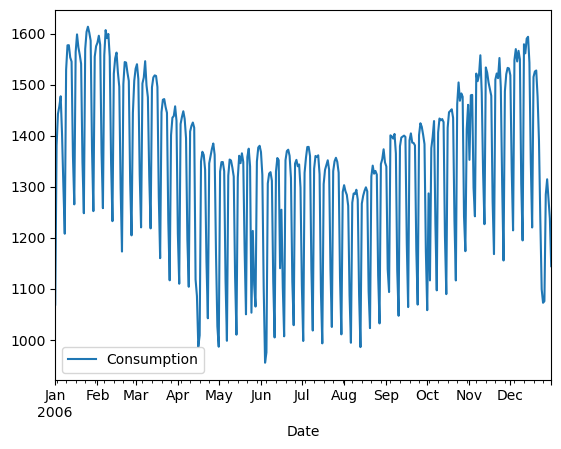

In [162]:
# cek 2006

df_opsd.loc["2006", ["Consumption"]].plot()

<AxesSubplot:xlabel='Date'>

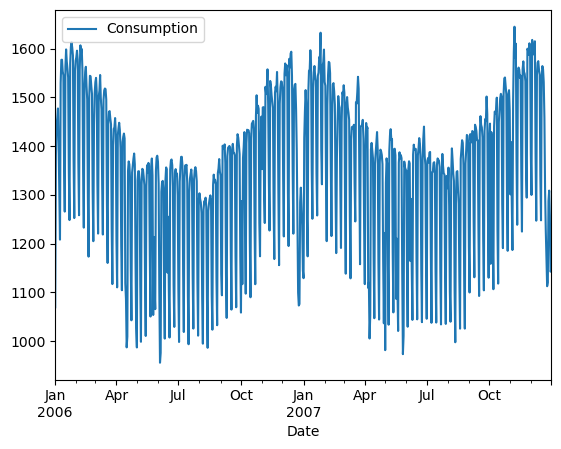

In [163]:
# cek 2006 dan 2007 nyambung
df_opsd.loc["2006":"2007", ["Consumption"]].plot()

sepertinya ada trend penggunaan energi yang lebih tinggi di awal tahun (kecuali Jan awal banget) menurun sampai pertengahan tahun di bulan Jul Aug, kemudian naik lagi. Dengan pengecualian drop banget pemakaian energi di akhir/awal tahun.

kita coba resampling data menjadi rata2 per bulannya

In [171]:
# data rata2 pemakaian energi per bulan
df_opsd_monthly = df_opsd[["Consumption","Wind","Solar","Wind+Solar"]].resample("M").mean()

df_opsd_monthly

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,1461.442065,NaN,NaN,NaN
2006-02-28,1467.106893,NaN,NaN,NaN
2006-03-31,1418.649161,NaN,NaN,NaN
2006-04-30,1275.058900,NaN,NaN,NaN
2006-05-31,1253.488484,NaN,NaN,NaN
...,...,...,...,...
2017-08-31,1291.283022,177.412839,148.477677,325.890516
2017-09-30,1335.952031,209.591000,102.643033,312.234033
2017-10-31,1366.297385,402.583774,68.727645,471.311419


<AxesSubplot:xlabel='Date'>

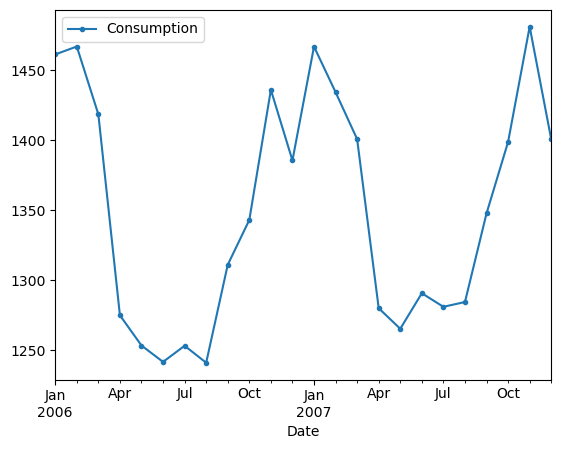

In [176]:
df_opsd_monthly.loc["2006":"2007",["Consumption"]].plot(marker=".")

<AxesSubplot:xlabel='Date'>

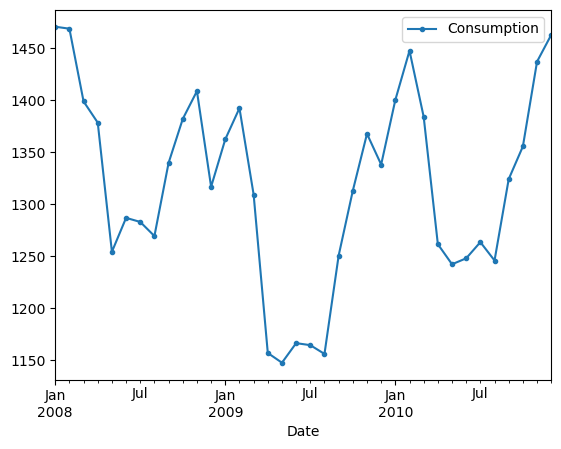

In [222]:
df_opsd_monthly.loc["2008":"2010",["Consumption"]].plot(marker=".")

pemakaian energi terendah ada di bulan apr - aug lalu ada dip di dec.

dari informasi ini, kita bisa coba cari informasi tambahan tentang Jerman, kira2 kenapa ada tren pemakaian listrik naik sejak Sep sampai Mar, baru turun kemudian naik lagi.

kita bisa menebak mungkin ini terjadi karena perubahan musim. orang Jerman tidak pakai ac di musim panas tapi pakai pemanas di musim gugur dan musim dingin (perlu di cek kebenarannya di tempat lain).

<AxesSubplot:title={'center':'Consumption'}, xlabel='[month]'>

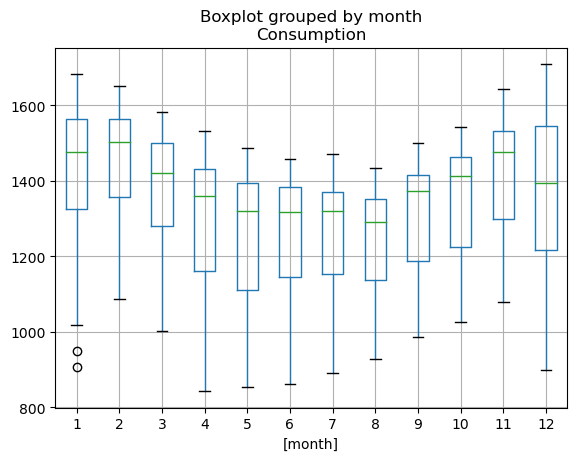

In [181]:
# lanjut ke mencoba melihat trend pemakaian listrik dalam 1 bulan

df_opsd.boxplot(column=["Consumption"], by=["month"])

In [204]:
# bulan januari saja
years = range(2006, 2018)

df_month_peryear = pd.DataFrame()

for y in years:
    df_month_peryear[y] = df_opsd[(df_opsd["month"] == 1) & (df_opsd["year"] == y)]["Consumption"].reset_index()["Consumption"]

df_month_peryear

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1069.184,1128.843,1083.424,1018.975,1057.372,1080.314,948.128,906.910,1080.080,1111.336,1060.366,1130.413
1,1380.521,1416.669,1396.483,1161.911,1161.042,1104.799,1269.581,1160.174,1343.101,1300.884,1192.698,1441.052
2,1442.533,1471.586,1523.427,1178.078,1132.069,1422.242,1334.745,1199.565,1379.776,1265.271,1179.282,1529.990
3,1457.217,1514.823,1512.429,1130.021,1346.250,1482.161,1347.136,1198.952,1271.029,1198.854,1456.294,1553.083
4,1477.131,1484.168,1355.843,1333.041,1457.374,1489.005,1376.658,1108.271,1182.416,1449.861,1506.737,1547.238
5,1403.427,1249.663,1209.011,1340.896,1434.055,1387.512,1291.215,1035.316,1408.202,1452.891,1454.685,1501.795
6,1300.287,1173.687,1542.984,1472.995,1493.432,1404.173,1175.688,1364.084,1529.250,1569.872,1540.304,1405.145
7,1207.985,1510.013,1565.447,1454.562,1489.440,1248.835,1103.383,1397.750,1550.398,1586.974,1515.840,1301.011
8,1529.323,1554.889,1561.768,1453.077,1380.071,1161.691,1443.371,1408.435,1572.194,1563.293,1311.996,1604.348
9,1576.911,1556.122,1571.959,1280.255,1240.762,1495.649,1434.631,1388.447,1552.413,1331.448,1217.985,1639.046


<AxesSubplot:>

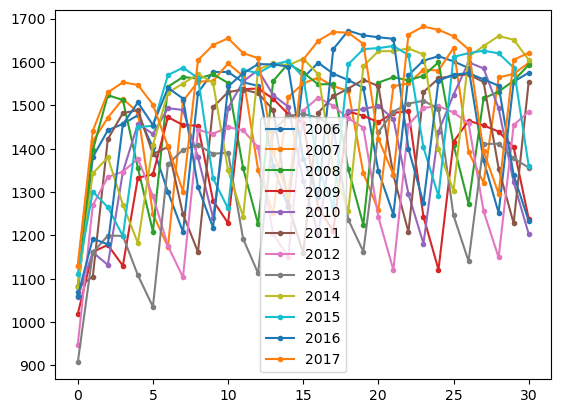

In [221]:
df_month_peryear.plot(marker=".")

<AxesSubplot:>

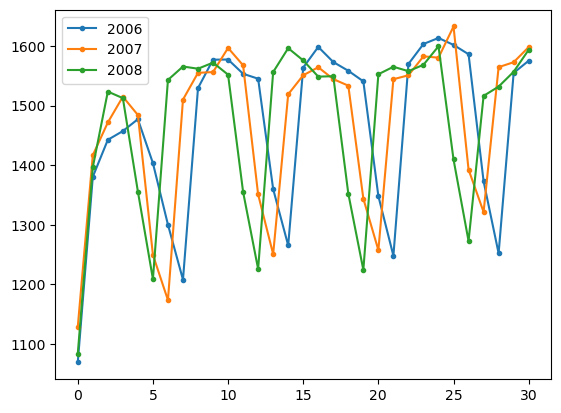

In [220]:
df_month_peryear[[2006,2007,2008]].plot(marker=".")

sepertinya setelah melihat perbandingan pemakaian energi dalam bulan Januari dari tahun ke tahun, ada tren mingguan dalam pemakaian energi.

kita bisa cek lebih lanjut tren mingguan ini.